# Minimalistic Map of Sampling Locations of Goura Cristata

/home/laniel/miniforge3/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


http://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/export?bbox=4277630.480996102,828935.4096117946,5288854.213648331,1648002.9442960906&bboxSR=23830&imageSR=23830&size=1000,809&dpi=96&format=png32&transparent=true&f=image


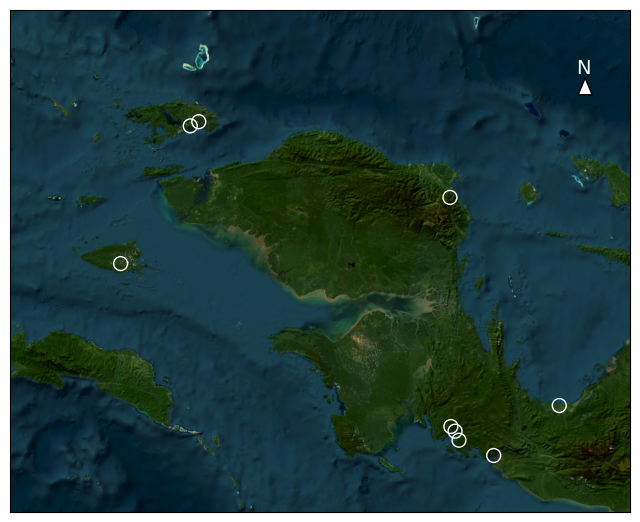

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(8, 8))

# Create a map centered around the Birdshead Peninsula and Raja Ampat Islands
map = Basemap(llcrnrlat=-5, urcrnrlat=1, llcrnrlon=129,
              urcrnrlon=136, epsg=23830)

map.arcgisimage(service='World_Imagery', xpixels = 1000, verbose= True)
# map.drawmapscale(130, -4.5, 130, -4.5, 200, fillcolor1= 'w', fontcolor='w', fontsize=14) # Add scale bar

# Add north arrow
a1, a2 = map(135.5, 0.25)
t1, t2 = map(135.5-0.1,0.25+0.05)
plt.annotate('.', xy=(a1,a2), arrowprops=dict(facecolor='white', headwidth=10))
plt.annotate('N', xy=(t1,t2), color='white', fontsize=14)

# Add locations as (longitude, latitude, color) triplets
point_color = 'w' # Color of location points
locations = [
    (130.2, -1.95, point_color, 'Misool Island', '1860', 130.3, -1.85), # Misool Island, unspecified, 1860
    (135.3, -3.4, point_color, 'Rubi (Irubi)', '1873', 135.3, -3.3), # Rubi (Irubi), 1873
    (134.6, -4, point_color, 'Etna Bay', '1896', 134.6, -4.2), # Etna Bay, 1896
    (134.15, -3.75, point_color, 'Triton Bay', '1896', 134.1, -3.9), # Triton Bay, unspecified, 1896
    (131.1, -0.25, point_color, 'Waigeo Island', '1902', 131.1, -0.1), # Waigeo Island, unspecified, 1902
    (131, -0.3, point_color, 'Waigeo Island, Majalabit Bay', '1925', 131.25, -0.55), # Waigeo Island, Majalabit Bay, 1925
    (134.2, -3.85, point_color, 'Triton Bay, Kamaka', '2014', 134.25, -4.05), # Triton Bay, Kamaka, 2014
    (134.1, -3.7, point_color, 'Triton Bay, Lengguru River', '2014', 134, -3.7), # Triton Bay, Lengguru River, 2014
    (134, -1.1, point_color, 'Arfak Mountains', 'unspecified', 134, -1), # Arfak Mountains, no-year
]
for lon, lat, markercolor, location, year, text_lon, text_lat in locations:
    x, y = map(lon, lat)
    map.scatter(x, y, marker='o', facecolors='none', edgecolors=markercolor, s=100)
    x, y = map(text_lon, text_lat)
    # plt.text(x, y, f'{location}, {year}', color='white', ha='right', va='bottom', fontsize=8)

# plt.title(r'$\it{Goura}$ $\it{cristata}$ Sampling Sites',size=12)
plt.show()

In [2]:
fig.savefig('../../results/figures/g_cristata_sampling_sites.minimalistic.png', bbox_inches='tight', dpi=150) # Map size and resolution is controlled by the dpi